## Imports

In [1]:
#pip install import-ipynb
#!pip install dill


In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import random
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
# from matplotlib import animation
# from JSAnimation.IPython_display import display_animation
# import gym
import scipy.stats as stats
from scipy.stats import norm
from collections import namedtuple
import statistics
import time
import os
from collections import deque
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
from collections import deque

import yfinance as yf
import datetime as dt

import pickle
import dill


##Importing environment classes

import import_ipynb
import Generate_Data
import Environment

/Users/weihangoh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/weihangoh/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/Users/weihangoh/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100

## Loading Existing Models

Episode 0/1000, Total Reward: 15.257490988147346, P&L: 8.614349365234375, Std Dev P&L: [nan]
Episode 100/1000, Total Reward: 173.62564961228566, P&L: -312.74566650390625, Std Dev P&L: [96.14547186338253]
Episode 200/1000, Total Reward: 33.76042379636455, P&L: 54.02793884277344, Std Dev P&L: [101.377955575173]
Episode 300/1000, Total Reward: -34.03991715565954, P&L: -64.78347778320312, Std Dev P&L: [81.61222722348484]
Episode 400/1000, Total Reward: -68.03387263298279, P&L: -114.10408020019531, Std Dev P&L: [111.67756315251046]
Episode 500/1000, Total Reward: 98.89845753622015, P&L: -92.29564666748047, Std Dev P&L: [112.75637744260777]
Episode 600/1000, Total Reward: -25.469509979220433, P&L: -19.066905975341797, Std Dev P&L: [163.1864817344755]
Episode 700/1000, Total Reward: 102.48359214749537, P&L: -57.69920349121094, Std Dev P&L: [152.41429371975119]
Episode 800/1000, Total Reward: 92.03030543512246, P&L: 1.123809814453125, Std Dev P&L: [145.5413661702952]
Episode 900/1000, Total Re

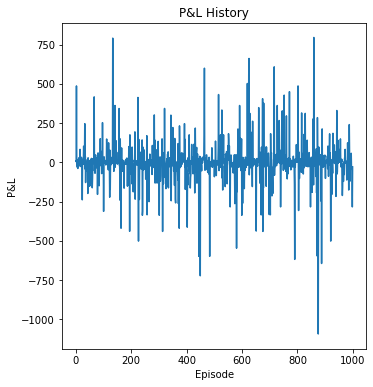

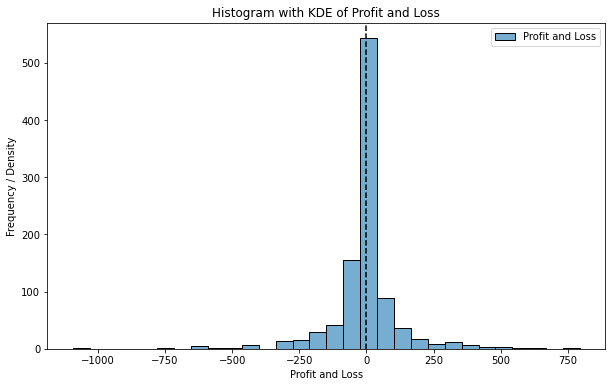

In [3]:
import Delta_Baseline

# Load the agent using dill
with open("models/trained_delta_agent.pkl", "rb") as f:
    delta_agent = dill.load(f)

Episode 0/1000, Total Reward: -94.84126486475078, P&L: 17.525291442871094, Std Dev P&L: [nan]
Episode 100/1000, Total Reward: 0.35049453231196503, P&L: 20.08657455444336, Std Dev P&L: [89.34303543740738]
Episode 200/1000, Total Reward: -10.191859667538246, P&L: -18.578147888183594, Std Dev P&L: [152.1008918691714]
Episode 300/1000, Total Reward: 12.736079415672892, P&L: 43.42002868652344, Std Dev P&L: [159.96313805309043]
Episode 400/1000, Total Reward: 35.27552292726748, P&L: -34.21745300292969, Std Dev P&L: [209.20304935800058]
Episode 500/1000, Total Reward: -37.60696308231872, P&L: 3.3174514770507812, Std Dev P&L: [134.21300258798786]
Episode 600/1000, Total Reward: -1.9714194963187528, P&L: 24.127769470214844, Std Dev P&L: [97.70161369515596]
Episode 700/1000, Total Reward: 187.78539657549734, P&L: -61.20414733886719, Std Dev P&L: [149.18419646645523]
Episode 800/1000, Total Reward: 2.558097325891582, P&L: 8.033180236816406, Std Dev P&L: [104.65387410262078]
Episode 900/1000, Tota

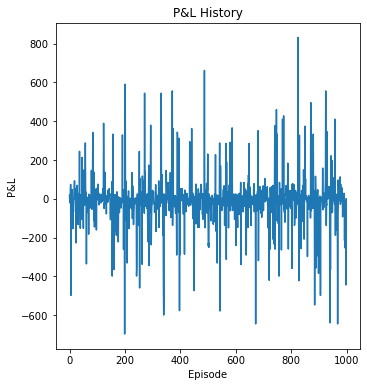

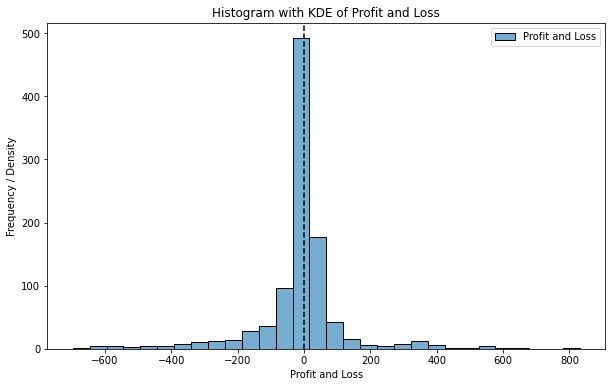

In [4]:
import Gamma_Baseline

# Load the agent using dill
with open("models/trained_gamma_agent.pkl", "rb") as f:
    gamma_agent = dill.load(f)

Episode 0/1000, Total Reward: 36.33748124050481, P&L: -38.54408264160156, Std Dev P&L: [nan]
Episode 100/1000, Total Reward: 22.844315223232364, P&L: 2.6050567626953125, Std Dev P&L: [137.82558326839717]


<string>:85: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:278.)


Episode 200/1000, Total Reward: 2.8856929627964703, P&L: -8.38470458984375, Std Dev P&L: [109.35370858209328]
Episode 300/1000, Total Reward: -13.487148988293018, P&L: 7.8716278076171875, Std Dev P&L: [128.04511043071955]
Episode 400/1000, Total Reward: -30.571971469063136, P&L: 18.20220947265625, Std Dev P&L: [191.85117628544174]
Episode 500/1000, Total Reward: 156.66536552935003, P&L: 9.8052978515625, Std Dev P&L: [143.56128629817397]
Episode 600/1000, Total Reward: 83.06005709772538, P&L: -13.876533508300781, Std Dev P&L: [265.9919474322229]
Episode 700/1000, Total Reward: 45.75236136105342, P&L: -45.16639709472656, Std Dev P&L: [74.63501328019048]
Episode 800/1000, Total Reward: 18.191397249988615, P&L: -3.317594528198242, Std Dev P&L: [300.3865187920239]
Episode 900/1000, Total Reward: 70.54038221000866, P&L: 284.65423583984375, Std Dev P&L: [147.99465483082278]


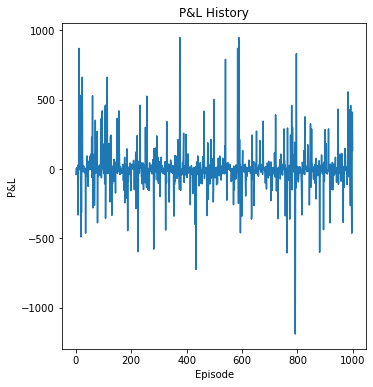

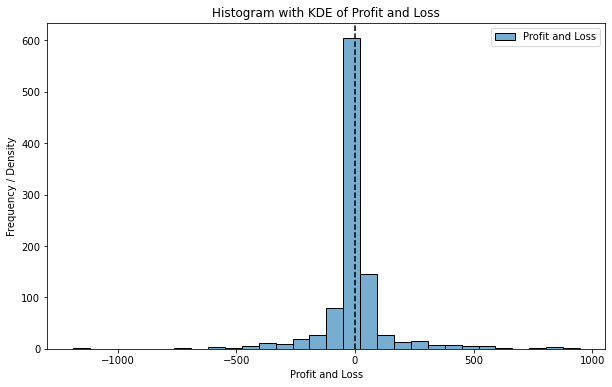

In [5]:
import DQN

# Load the agent using dill
with open("models/dqn_trained_agent.pkl", "rb") as f:
    dqn_agent = dill.load(f)


Episode 0/1000, Total Reward: -19550.71133751621, P&L: -365.8721923828125, Std Dev P&L: [nan]
Episode 100/1000, Total Reward: -410.9444855743195, P&L: 2.434253692626953, Std Dev P&L: [134.3319930198219]
Episode 200/1000, Total Reward: -1203.6318054058625, P&L: -23.94847869873047, Std Dev P&L: [105.89311308410977]
Episode 300/1000, Total Reward: -288.8288172058988, P&L: 4.644155502319336, Std Dev P&L: [143.8998117648356]
Episode 400/1000, Total Reward: -6572.8686952663, P&L: 23.527145385742188, Std Dev P&L: [200.7079457166917]
Episode 500/1000, Total Reward: -899.706278168921, P&L: 2.0643234252929688, Std Dev P&L: [116.59166505151299]
Episode 600/1000, Total Reward: -4486.132627151157, P&L: 142.42897033691406, Std Dev P&L: [99.50800648418098]
Episode 700/1000, Total Reward: -726.2266660355468, P&L: 57.96489715576172, Std Dev P&L: [116.4494376695836]
Episode 800/1000, Total Reward: -18331.48920265583, P&L: -149.49951171875, Std Dev P&L: [114.13061003412572]
Episode 900/1000, Total Reward

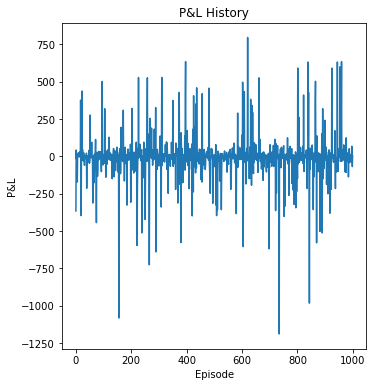

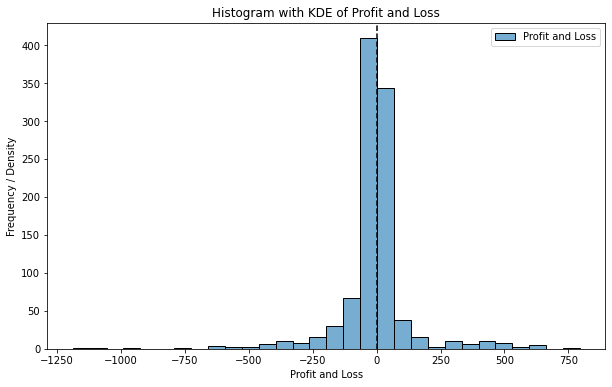

In [6]:
import DDPG

# Load the agent using dill
with open("models/ddpg_agent_full.pkl", "rb") as f:
    ddpg_agent = dill.load(f)

## Testing Suite

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random

def test_agent(env, agent, num_episodes, num_steps):
    """
    Test the trained agent in the given environment using unseen data.
    
    Parameters:
    - env: Testing environment with unseen data.
    - agent: The trained agent.
    - num_episodes: Number of episodes to test.
    - num_steps: Number of steps per episode.
    
    Returns:
    - pl_history: List of P&L values for each episode.
    - reward_history: List of total rewards for each episode.
    - std_pl_history: List of standard deviation of P&L over the last 30 episodes, starting from episode 30.
    """
    pl_history = []
    reward_history = []
    std_pl_history = []
    
    # Initialize a list to keep track of the last 30 P&L values
    last_30_pl = []
    
    for episode in range(1, num_episodes + 1):
        state = env.reset()
        
        total_reward = 0
        pl = []

        for step in range(num_steps):
            # Get the action from the trained agent (greedy policy, no exploration)
            action = agent.get_action(state, step=step, episode=episode)

            # Step in the environment
            next_state, reward, done, pv = env.step(action)

            # Accumulate reward
            total_reward += reward
            pl.append(pv)

            if done:
                break
            else:
                state = next_state

        # Calculate total P&L for the episode
        episode_pl = sum(pl)
        pl_history.append(episode_pl)
        reward_history.append(total_reward)
        
        # Update the moving window of the last 30 P&L values
        last_30_pl.append(episode_pl)
        if len(last_30_pl) > 30:
            # Remove the oldest P&L value to maintain the window size
            last_30_pl.pop(0)
        
        # Compute the standard deviation only if we've completed at least 30 episodes
        if episode >= 30:
            std = np.std(last_30_pl)
            std_pl_history.append(std)
        else:
            # Append NaN or any other placeholder for the initial episodes
            std_pl_history.append(np.nan)

        # Optional: Print progress every 100 episodes
        if episode % 100 == 0 or episode == 1:
            print(f"Episode {episode}/{num_episodes} completed.")

    return pl_history, reward_history, std_pl_history


In [8]:
##Getting test datasets
features_test = Generate_Data.features_test
df_stock_test = Generate_Data.df_stock_test
call_options_test = Generate_Data.call_options_test

#Set up your environment with real AAPL stock and option data
env_test = Environment.Environment(
    stock_data=df_stock_test,
    option_data=call_options_test,
    features_data=features_test,
    T=30,
    n_steps=30,
    num_sold_opt=100,
    kappa=0.1,
    alpha=0.001
)

Episode 1/1000 completed.
Episode 100/1000 completed.
Episode 200/1000 completed.
Episode 300/1000 completed.
Episode 400/1000 completed.
Episode 500/1000 completed.
Episode 600/1000 completed.
Episode 700/1000 completed.
Episode 800/1000 completed.
Episode 900/1000 completed.
Episode 1000/1000 completed.


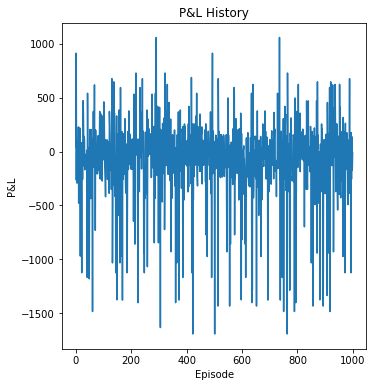

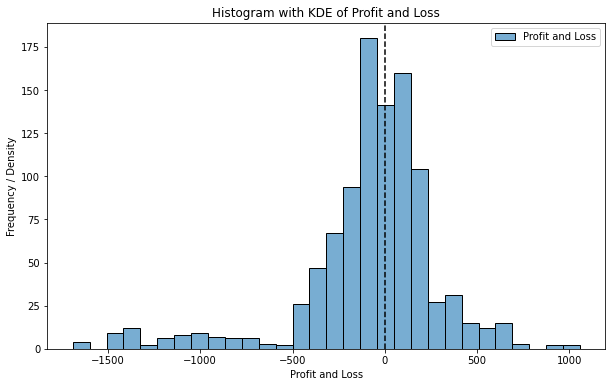

In [9]:
# Test the agent
pl_history_delta, reward_history_delta, std_pl_delta = test_agent(env_test, delta_agent, num_episodes=1000, num_steps=30)

plt.figure(figsize=(12, 6))

# Plot P&L history
plt.subplot(1, 2, 1)
plt.plot(pl_history_delta)
plt.title("P&L History")
plt.xlabel("Episode")
plt.ylabel("P&L")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(pl_history_delta, kde=False, bins=30, label="Profit and Loss", alpha=0.6)

plt.axvline(0, color='k', linestyle='--')  # Mark zero for reference
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency / Density")
plt.title("Histogram with KDE of Profit and Loss")
plt.legend()
plt.show()

plt.show()

Episode 1/1000 completed.
Episode 100/1000 completed.
Episode 200/1000 completed.
Episode 300/1000 completed.
Episode 400/1000 completed.
Episode 500/1000 completed.
Episode 600/1000 completed.
Episode 700/1000 completed.
Episode 800/1000 completed.
Episode 900/1000 completed.
Episode 1000/1000 completed.


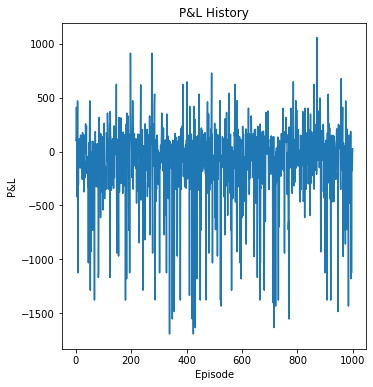

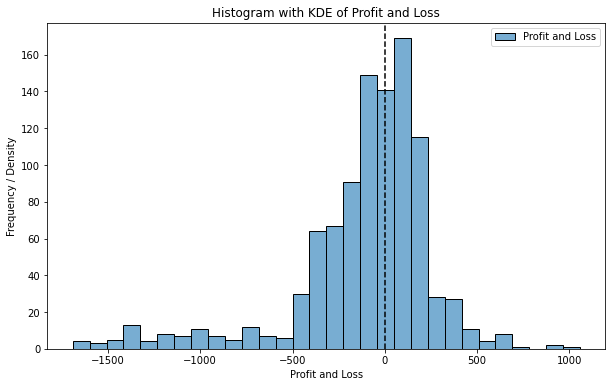

In [10]:
# Test the agent
pl_history_gamma, reward_history_gamma, std_pl_gamma = test_agent(env_test, gamma_agent, num_episodes=1000, num_steps=30)

plt.figure(figsize=(12, 6))

# Plot P&L history
plt.subplot(1, 2, 1)
plt.plot(pl_history_gamma)
plt.title("P&L History")
plt.xlabel("Episode")
plt.ylabel("P&L")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(pl_history_gamma, kde=False, bins=30, label="Profit and Loss", alpha=0.6)

plt.axvline(0, color='k', linestyle='--')  # Mark zero for reference
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency / Density")
plt.title("Histogram with KDE of Profit and Loss")
plt.legend()
plt.show()

plt.show()

Episode 1/1000 completed.
Episode 100/1000 completed.
Episode 200/1000 completed.
Episode 300/1000 completed.
Episode 400/1000 completed.
Episode 500/1000 completed.
Episode 600/1000 completed.
Episode 700/1000 completed.
Episode 800/1000 completed.
Episode 900/1000 completed.
Episode 1000/1000 completed.


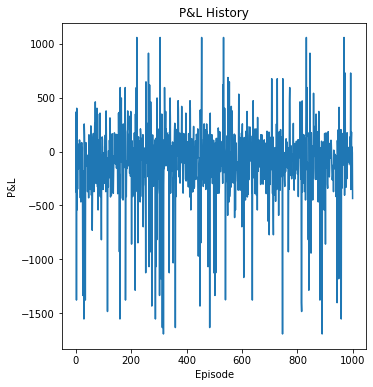

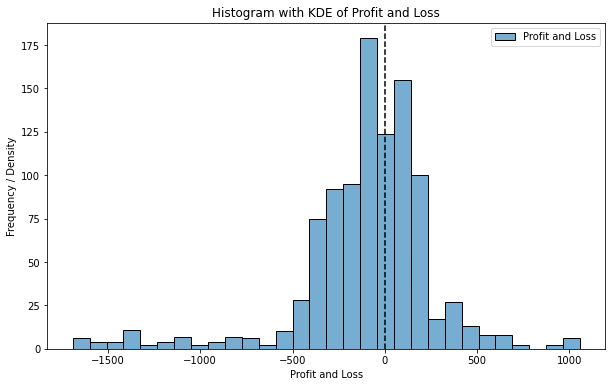

In [11]:
# Test the agent
pl_history_dqn, reward_history_dqn, std_pl_dqn = test_agent(env_test, dqn_agent, num_episodes=1000, num_steps=30)

plt.figure(figsize=(12, 6))

# Plot P&L history
plt.subplot(1, 2, 1)
plt.plot(pl_history_dqn)
plt.title("P&L History")
plt.xlabel("Episode")
plt.ylabel("P&L")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(pl_history_dqn, kde=False, bins=30, label="Profit and Loss", alpha=0.6)

plt.axvline(0, color='k', linestyle='--')  # Mark zero for reference
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency / Density")
plt.title("Histogram with KDE of Profit and Loss")
plt.legend()
plt.show()

plt.show()

Episode 1/1000 completed.
Episode 100/1000 completed.
Episode 200/1000 completed.
Episode 300/1000 completed.
Episode 400/1000 completed.
Episode 500/1000 completed.
Episode 600/1000 completed.
Episode 700/1000 completed.
Episode 800/1000 completed.
Episode 900/1000 completed.
Episode 1000/1000 completed.


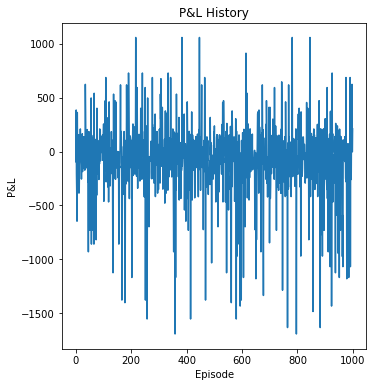

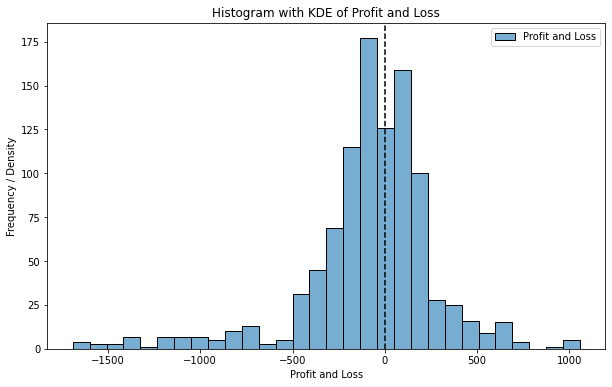

In [12]:
# Test the agent
pl_history_ddpg, reward_history_ddpg, std_pl_ddpg = test_agent(env_test, ddpg_agent, num_episodes=1000, num_steps=30)

plt.figure(figsize=(12, 6))

# Plot P&L history
plt.subplot(1, 2, 1)
plt.plot(pl_history_ddpg)
plt.title("P&L History")
plt.xlabel("Episode")
plt.ylabel("P&L")

# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(pl_history_ddpg, kde=False, bins=30, label="Profit and Loss", alpha=0.6)

plt.axvline(0, color='k', linestyle='--')  # Mark zero for reference
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency / Density")
plt.title("Histogram with KDE of Profit and Loss")
plt.legend()
plt.show()

plt.show()

## Combining

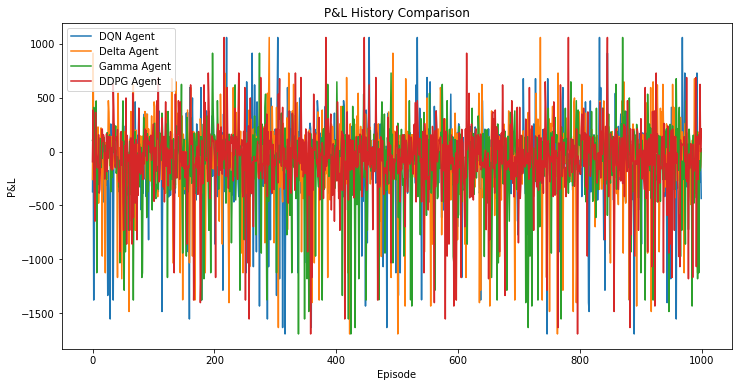

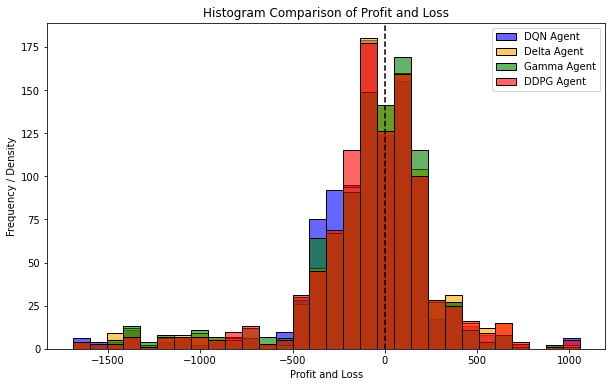

In [13]:
# Plot P&L history comparison
plt.figure(figsize=(12, 6))

# Line plot of P&L histories
plt.plot(pl_history_dqn, label="DQN Agent")
plt.plot(pl_history_delta, label="Delta Agent")
plt.plot(pl_history_gamma, label="Gamma Agent")
plt.plot(pl_history_ddpg, label="DDPG Agent")

plt.title("P&L History Comparison")
plt.xlabel("Episode")
plt.ylabel("P&L")
plt.legend()
plt.show()

# Histogram comparison
plt.figure(figsize=(10, 6))

sns.histplot(pl_history_dqn, kde=False, bins=30, label="DQN Agent", color="blue", alpha=0.6)
sns.histplot(pl_history_delta, kde=False, bins=30, label="Delta Agent", color="orange", alpha=0.6)
sns.histplot(pl_history_gamma, kde=False, bins=30, label="Gamma Agent", color="green", alpha=0.6)
sns.histplot(pl_history_ddpg, kde=False, bins=30, label="DDPG Agent", color="red", alpha=0.6)

plt.axvline(0, color='k', linestyle='--')  # Mark zero for reference
plt.xlabel("Profit and Loss")
plt.ylabel("Frequency / Density")
plt.title("Histogram Comparison of Profit and Loss")
plt.legend()
plt.show()

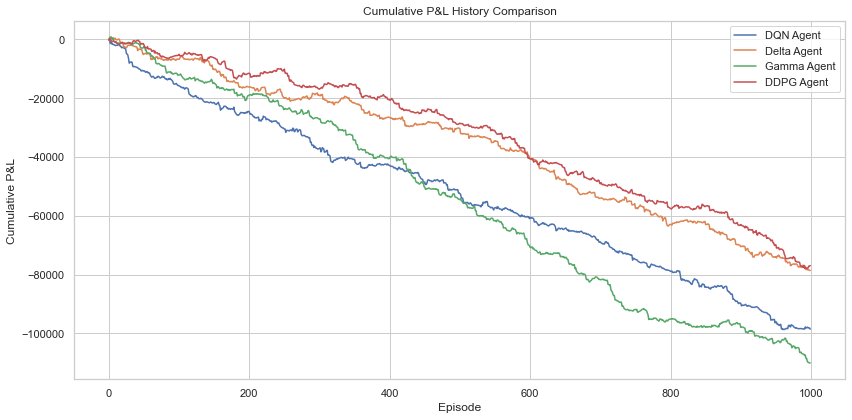

In [14]:
cum_pl_dqn = np.cumsum(pl_history_dqn)
cum_pl_delta = np.cumsum(pl_history_delta)
cum_pl_gamma = np.cumsum(pl_history_gamma)
cum_pl_ddpg = np.cumsum(pl_history_ddpg)

# Ensure consistent plotting style
sns.set(style="whitegrid")

# Plot Cumulative P&L comparison
plt.figure(figsize=(12, 6))

plt.plot(cum_pl_dqn, label="DQN Agent")
plt.plot(cum_pl_delta, label="Delta Agent")
plt.plot(cum_pl_gamma, label="Gamma Agent")
plt.plot(cum_pl_ddpg, label="DDPG Agent")

plt.title("Cumulative P&L History Comparison")
plt.xlabel("Episode")
plt.ylabel("Cumulative P&L")
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
print(reward_history_ddpg)
print(reward_history_delta)
print(reward_history_dqn)
print(reward_history_gamma)

[-30276.016293158835, -45922.33985338544, -114129.5670461338, -30043.477556808168, -292602.9056783539, -32375.908138143357, -52824.513335128, -73690.59530050511, -45105.51846098504, -35593.320194289525, -29784.696211370487, -105685.32097206623, -40643.215929737504, -23556.93861747758, -92969.8507945353, -20620.67501282315, -19665.74466741844, -33383.369891637885, -38128.02341444699, -17630.007521534906, -53697.66779704962, -34008.40049290867, -55637.624307628095, -22415.833953790556, -27049.4242665516, -23990.885187000687, -25760.94406677121, -36892.43053261066, -15074.495957642584, -28544.810873196784, -42227.58623600974, -28556.005111534465, -17992.339172243504, -37750.34460669801, -63454.80109505183, -46431.36096819653, -25236.475268025675, -17000.30813264152, -35204.35347554793, -20592.85360156789, -16924.37255577403, -45993.44754196868, -14198.362650512261, -20535.335802041343, -28742.902746823307, -306092.8998342361, -35647.975854881835, -32404.884402901575, -92477.45672942257, -

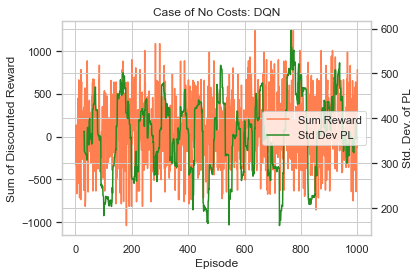

In [16]:
# Prepare data for plotting
episodes = np.array(list(range(1, len(reward_history_delta) + 1)))
rewards = np.array(reward_history_delta)
std_pl = np.array(std_pl_delta)

# Create a figure for dual-axis plotting
fig = plt.figure(figsize=[6, 4])
ax1 = fig.add_subplot(111)

# Plot Sum of Discounted Reward
ax1.plot(episodes, rewards, color='coral', label='Sum Reward')
ax1.set_xlabel('Episode')
ax1.set_ylabel("Sum of Discounted Reward")
h1, l1 = ax1.get_legend_handles_labels()

# Create a secondary axis for Std Dev PL
ax2 = ax1.twinx()
ax2.plot(episodes, std_pl, color='forestgreen', label='Std Dev PL')
ax2.set_ylabel("Std. Dev. of PL")
h2, l2 = ax2.get_legend_handles_labels()

# Combine legends for both axes and set the title
ax2.legend(h1 + h2, l1 + l2, loc='center right')
ax1.set_title('Case of No Costs: DQN')

plt.tight_layout()
plt.show()

In [17]:
print(std_pl)

[         nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan          nan
          nan          nan          nan          nan 370.62995401
 370.74510957 326.16388475 325.72534703 323.90443104 322.07693472
 321.77794039 320.39913133 319.25824716 319.29718499 314.42055024
 306.74065512 362.98048317 379.64072325 379.57398789 375.69956306
 375.69958886 340.9629873  340.83587603 393.30119839 397.34497631
 399.43828161 353.90097818 354.37866459 357.45951473 362.0102313
 365.41076554 352.25088808 342.54129173 343.51932387 344.49423289
 420.16150019 420.28281905 420.95851718 431.08040707 431.07111257
 430.70544043 433.81202595 454.40736348 454.44182468 456.62971605
 469.81352514 431.975976   417.88285435 417.83553914 417.37621804
 418.603366